# Homework 4
## MET CS 688
### Maryam Asghari

In [27]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from scipy import spatial

In [28]:
#ignore the pink warning bars
import warnings
warnings.filterwarnings('ignore')

### Function to read the image image and get its ts and dim

In [29]:
def read_image(fname):
    # Use L to get gray scale img
    image = Image.open(fname).convert("L")
    #get the image matrix
    arr = np.asarray(image)
    #convert to ts
    ts = pd.Series(arr.flatten())
    #plot the img
    plt.imshow(image, cmap='gray')
    plt.show()
    #get w and h of the img
    h,w= arr.shape[:2]
    # return the Ts, H and w 
    return (ts,h,w,arr,image)

### Reading the Bug image

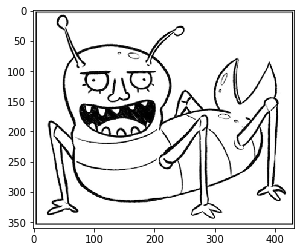

Bug image w: 432, h: 360


In [30]:
bug = read_image('Bug Final.png')
# save the Ts, H and w of the bug img
bug_ts , bug_h , bug_w = bug[0:3]
print('Bug image w: {}, h: {}'.format(bug_w , bug_h )) 

In [31]:
bug_arr =bug[3]
bug_arr

array([[255, 255, 255, ..., 254, 254, 255],
       [255, 255, 255, ..., 253, 254, 254],
       [255, 255, 255, ..., 157, 178, 240],
       ...,
       [255, 255, 255, ..., 254, 254, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [32]:
bug_ts

0         255
1         255
2         255
3         255
4         254
         ... 
155515    255
155516    255
155517    255
155518    255
155519    255
Length: 155520, dtype: uint8

### Reading the clean chickens image

In [11]:
fig = plt.figure(figsize=(20, 10))
chicks = read_image('chickens clean.png')
ch_h , ch_w = chicks[1:3]
print('chicks image w: {}, h: {}'.format(ch_w , ch_h )) 

FileNotFoundError: [Errno 2] No such file or directory: 'chickens clean.png'

<Figure size 1440x720 with 0 Axes>

#### Resize the image

The sizes are not divisible by bugs h and w so I resized the image before so it will be divisible by the size of the bug image

for this part since its not a part of homework I used opencv and here the code that I used 

In [10]:
#----- Do not Run-------#

import cv2 as cv
#read the image
img1 = cv.imread("Chickens clean.png")
#print the size of bug image
print('Image shape: {}'.format(img1.shape))
#increase the size of plot
#plt.figure(figsize=(10,5))
#show the image
#plt.imshow(img1)
# Resize the chickens picture
#The size of the image is not devisable by the bug so we can resize the Chickens image first
#resize the image
img_re = cv.resize(img1,(4320,3600),cv.INTER_AREA)
#save the resized image
cv.imwrite('scaled.png', img_re)
#increase the size of plot
plt.figure(figsize=(10,5))
#show the plot
plt.imshow(img_re,cmap='gray')
#print the size of new image 
print('Image shape: {}'.format(img_re.shape))

### Reading the resized Chicken image

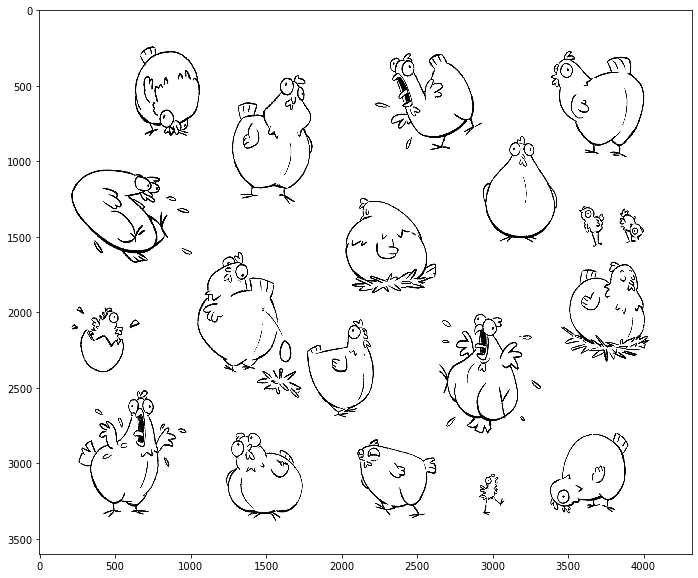

chicks image w: 4320, h: 3600


In [33]:
fig = plt.figure(figsize=(20, 10))
chicks = read_image('scaled.png')
ch_h , ch_w = chicks[1:3]
print('chicks image w: {}, h: {}'.format(ch_w , ch_h )) 

### Save bug and clean chickens images to use later 

In [34]:
#same the image to use later
chickens_img = chicks[4]
bug_img =bug[4]

### Function to place the bug image in the chicken image

In [12]:
def paste_bug(chickens_img,bug_img,x,y,fname):
    #create a copy of chicken image 
    ch = chickens_img.copy()
    # paste the bug in the position of x and y 
    ch.paste(bug_img,(x,y))
    #save the new image with the bug in it 
    ch.save(fname,quality=95)
    # use our read image function to get the ts, w and h of the new img 
    img = read_image(fname)
    return img

#### Using the Paste function

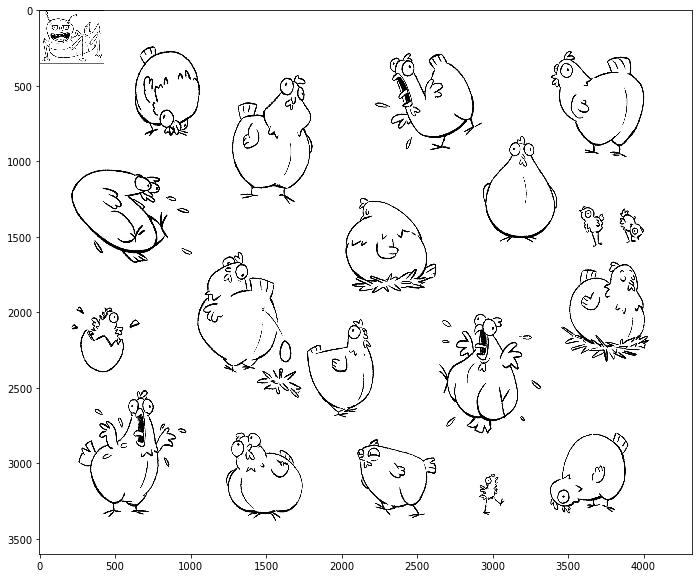

We placed the bug image in x: 0, y: 0


In [13]:
fig = plt.figure(figsize=(20, 10))
S1 = paste_bug(chickens_img,bug_img,0,0,'S1.png')
S1_h , S1_w = S1[1:3]
print('We placed the bug image in x: {}, y: {}'.format(0,0)) 

## Create a function to find the x,y of the bug 

In [15]:
def find_bug(img,bug,step_1,step_2):
    
    x = bug[0]
    arr = img[3]
    h,w = img[1:3]
    bug_arr =bug[3]

    min = float('inf')

    for i in range(0, h,step_1):
        for j in range(0,w,step_2):
            patch = arr[i:360+i, j:432+j]
            #exit if we find the bug
            if (np.array_equal(bug_arr,patch)):
                return (patch, j , i , 0)
            else:
                y = pd.Series(patch.flatten() )
                #Euclidean distance measure 
                dist= np.linalg.norm(x-y)
                if dist < min:
                    min = dist
                    bug_patch = patch
                    bug_y , bug_x = i,j
    
    return (bug_patch, bug_x , bug_y ,min)

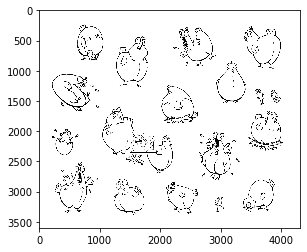

We placed the bug image in x: 1505, y: 2000


In [16]:
x,y = 1505,2000
S6 = paste_bug(chickens_img,bug_img,x,y,'S6.png')
S6_h , S6_w = S6[1:3]
print('We placed the bug image in x: {}, y: {}'.format(x,y)) 

#### Method 1 , non overlaping patches

In [17]:
%time res6_ = find_bug(S6,bug,bug_h , bug_w )
print('Bug is in x: {}, y: {}'.format(res6_[1] ,res6_[2]))
print('min distance is : {}'.format(res6_[3]))

CPU times: user 430 ms, sys: 15.8 ms, total: 446 ms
Wall time: 80.1 ms
Bug is in x: 0, y: 0
min distance is : 38051.412956682696


#### Method 2 , Step size 10

In [19]:
%time res6 = find_bug(S6,bug,10,10)
print('Bug is in x: {}, y: {}'.format(res6[1] ,res6[2]))
print('min distance is : {}'.format(res6[3]))

CPU times: user 16min 26s, sys: 5.46 s, total: 16min 32s
Wall time: 2min 4s
Bug is in x: 2300, y: 920
min distance is : 37907.31140558507


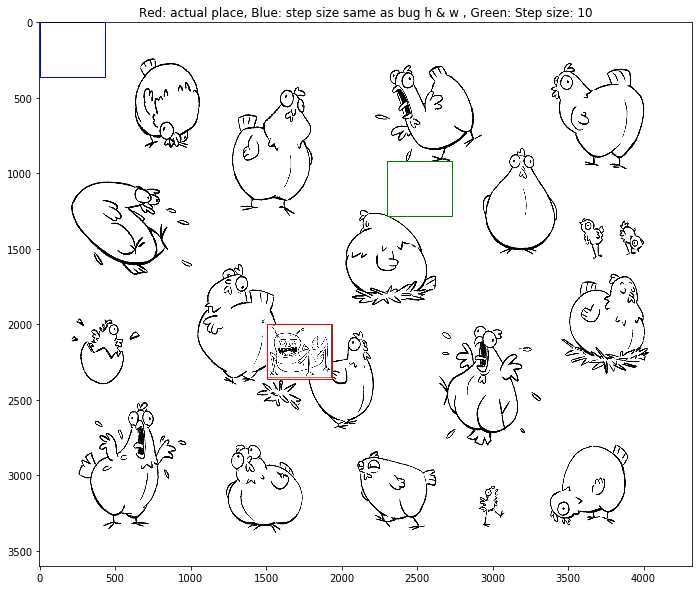

In [20]:
fig = plt.figure(figsize=(20, 10))
ax = plt.subplot()
ax.imshow(S6[4], cmap='gray')
ax.set_title('Red: actual place, Blue: step size same as bug h & w , Green: Step size: 10')
rect1 = plt.Rectangle((x,y), bug_w , bug_h, edgecolor='r', facecolor='none')
ax.add_patch(rect1)
rect2 = plt.Rectangle((res6_[1] ,res6_[2]), bug_w , bug_h, edgecolor='b', facecolor='none')
ax.add_patch(rect2)
rect3 = plt.Rectangle((res6[1] ,res6[2]), bug_w , bug_h, edgecolor='g', facecolor='none')
ax.add_patch(rect3)
plt.show()

These two method only can find the bug when it's 1)inside the patches 2)x and y are divisible by 10. even with 5 number diffrence it can not find the bug 

### Method 3

Cosine distanceas simiraity messure ,checking non-ovelaping patches

In [21]:
from scipy.spatial import distance

def find_bug3(img,bug):
    
    #x = bug[0]
    bug_arr = bug[3]
    x = bug_arr.reshape(-1, bug_arr.size)
    arr = img[3]
    h,w = img[1:3]
    bug_h, bug_w = bug[1:3]
    c_dis = float('inf')
    
    for i in range(0, h,  bug_h):
        for j in range(0,w,bug_w):
            patch = arr[i:bug_h+i, j:bug_w+j]
            #exit if we find the bug
            if (np.array_equal(bug_arr,slice)):
                bug_patch = patch
                bug_y , bug_x = i,j
                c_dis = 1
                return (bug_patch, bug_x , bug_y , c_dis)
            else:
                y = patch.reshape(patch.size,-1)
                #Cosine distance
                dis = 1 - distance.cosine(x,y)
                if dis < c_dis:
                    c_dis = dis
                    bug_patch = patch
                    bug_y , bug_x = i,j
                    
    return (bug_patch, bug_x , bug_y , c_dis)

#### Lets test method 3 

In [29]:
#bug in (0,0)
#S1 = paste_bug(chickens_img,bug_img,0,0,'S1.png')

%time res_test = find_bug3(S1,bug)
print('Bug is in x: {}, y: {}'.format(res_test[1] ,res_test[2]))


CPU times: user 47.7 ms, sys: 1.2 ms, total: 48.9 ms
Wall time: 47.9 ms
Bug is in x: 0, y: 0


In [30]:
# divisible by bug size (1728,1080)
#S2 = paste_bug(chickens_img,bug_img,1728,1080,'S2.png')
%time res_test = find_bug3(S2,bug)
print('Bug is in x: {}, y: {}'.format(res_test[1] ,res_test[2]))


CPU times: user 49.8 ms, sys: 1.24 ms, total: 51 ms
Wall time: 50.2 ms
Bug is in x: 1728, y: 1080


In [31]:
res2 = find_bug(S2,bug,bug_h , bug_w)
print('Bug is in x: {}, y: {}'.format(res2[1] ,res2[2]))


Bug is in x: 1728, y: 1080


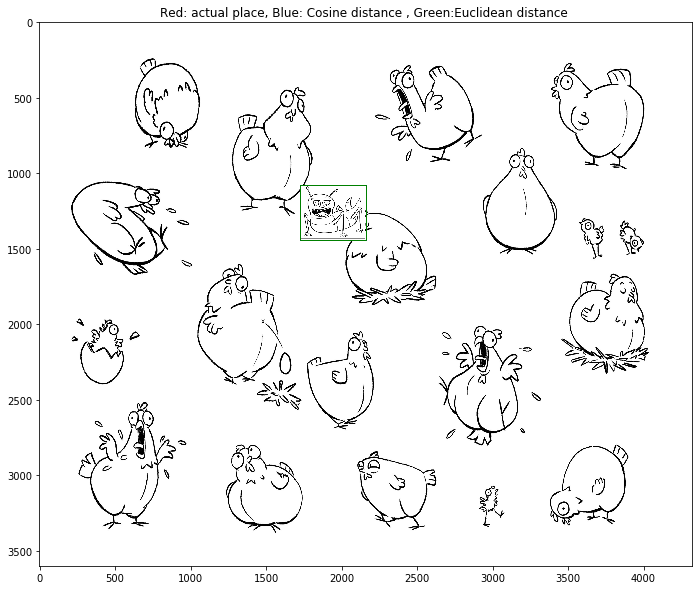

In [32]:
fig = plt.figure(figsize=(20, 10))
ax = plt.subplot()
ax.imshow(S2[4], cmap='gray')
ax.set_title('Red: actual place, Blue: Cosine distance , Green:Euclidean distance ')
rect1 = plt.Rectangle((1728,1080), bug_w , bug_h, edgecolor='r', facecolor='none')
ax.add_patch(rect1)
rect2 = plt.Rectangle((res_test[1] ,res_test[2]), bug_w , bug_h, edgecolor='b', facecolor='none')
ax.add_patch(rect2)
rect3 = plt.Rectangle((res2 [1] ,res2 [2]), bug_w , bug_h, edgecolor='g', facecolor='none')
ax.add_patch(rect3)
plt.show()

First example the bug was inside one patch and both methods can find it. 

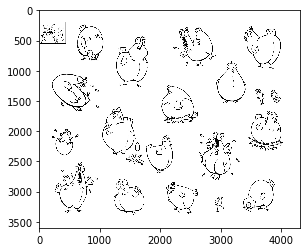

In [33]:
# divisible by 10 (10,200)
s_test = paste_bug(chickens_img,bug_img,10,200,'s_test.png')

In [34]:
%time res_test = find_bug3(s_test,bug)
print('Bug is in x: {}, y: {}'.format(res_test[1] ,res_test[2]))

CPU times: user 49.4 ms, sys: 1.25 ms, total: 50.7 ms
Wall time: 49.6 ms
Bug is in x: 0, y: 360


In [35]:
%time res_test2 = find_bug(s_test,bug,10,10)
print('Bug is in x: {}, y: {}'.format(res_test2[1] ,res_test2[2]))

CPU times: user 42.1 s, sys: 287 ms, total: 42.3 s
Wall time: 5.31 s
Bug is in x: 10, y: 200


In [36]:
%time res_test3 = find_bug(s_test,bug,bug_h , bug_w)
print('Bug is in x: {}, y: {}'.format(res_test3[1] ,res_test3[2]))

CPU times: user 363 ms, sys: 6.23 ms, total: 369 ms
Wall time: 46.4 ms
Bug is in x: 1296, y: 0


let's check them on the plot 

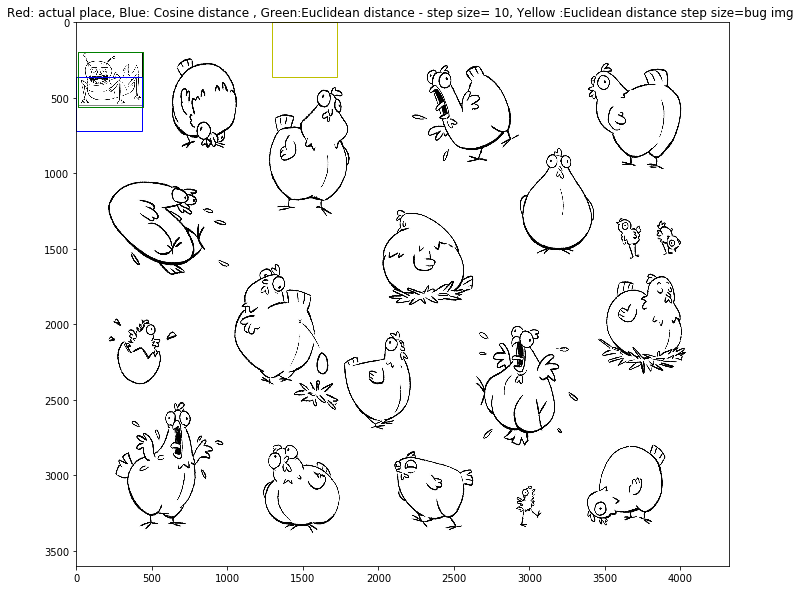

In [37]:
fig = plt.figure(figsize=(20, 10))
ax = plt.subplot()
ax.imshow(s_test[4], cmap='gray')
ax.set_title('Red: actual place, Blue: Cosine distance , Green:Euclidean distance - step size= 10, Yellow :Euclidean distance step size=bug img ')
rect1 = plt.Rectangle((10,200), bug_w , bug_h, edgecolor='r', facecolor='none')
ax.add_patch(rect1)
rect2 = plt.Rectangle((res_test[1] ,res_test[2]), bug_w , bug_h, edgecolor='b', facecolor='none')
ax.add_patch(rect2)
rect3 = plt.Rectangle((res_test2[1] ,res_test2[2]), bug_w , bug_h, edgecolor='g', facecolor='none')
ax.add_patch(rect3)
rect4 = plt.Rectangle((res_test3[1] ,res_test3[2]), bug_w , bug_h, edgecolor='y', facecolor='none')
ax.add_patch(rect4)
plt.show()

Method 3 is fast and still give a good result, method 2 with step size 10 will give the exact poit but it takes much longer , method 1 can not find the bug 

### Method 4 , Moving Window small step size - Cosine distance

Giving the option to give step size. 

In [38]:
def find_bug4(img,bug,step_size):
    
    #x = bug[0]
    bug_arr = bug[3]
    x = bug_arr.reshape(-1, bug_arr.size)
    arr = img[3]
    h,w = img[1:3]
    bug_h, bug_w = bug[1:3]
    c_dis = float('inf')
    #paded_Arr = np.pad(arr,((0,bug_h - step_size),(0,bug_w -step_size)),mode='constant',constant_values=0)
    for i in range(0, h-bug_h , step_size):
        for j in range(0,w-bug_w ,step_size):
            patch = arr[i:bug_h+i, j:bug_w+j]
            #exit if we find the bug
            if (np.array_equal(bug_arr,patch)):
                print('Bug is in x: {}, y: {}'.format(j ,i))
                return (patch, j , i , 1)
            else:
                y = patch.reshape(patch.size,-1)
                #Cosine distance
                dis = 1 - distance.cosine(x,y)
                if dis < c_dis:
                    c_dis = dis
                    bug_patch = patch
                    bug_y , bug_x = i,j
    
    print('Bug is in x: {}, y: {}'.format(bug_x ,bug_y))
    return (bug_patch, bug_x , bug_y , c_dis)

## Choosing random x , y to place the bug in chickens image

In [39]:
import random

### Puting the bug exactly in one of our 100 patches

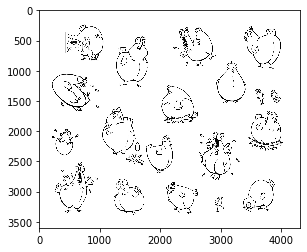

Bug is in x: 430, y: 360
CPU times: user 55.5 s, sys: 5.63 s, total: 1min 1s
Wall time: 1min 1s
CPU times: user 42.1 ms, sys: 4.09 ms, total: 46.2 ms
Wall time: 45.7 ms
Actual Position
Bug is in x: 432, y: 360
Step_size = 10
Bug is in x: 430, y: 360
step size= bug size
Bug is in x: 432, y: 360


In [40]:
# paste the bug in x,y position 
# using random generator to get a random number between 1 and 9 to randomly select a patch to put the bug in it 
x , y = bug_w*random.randint(1, 9),bug_h*random.randint(1, 9)
s_test = paste_bug(chickens_img,bug_img,x , y,'s_test.png')

# use method4 to find the bug 
%time res_test = find_bug4(s_test,bug,10)
# use method3 to find the bug 
%time res_test2 = find_bug3(s_test,bug)

print('Actual Position')
print('Bug is in x: {}, y: {}'.format(x ,y))

print('Step_size = 10')
print('Bug is in x: {}, y: {}'.format(res_test[1] ,res_test[2]))

print('step size= bug size')
print('Bug is in x: {}, y: {}'.format(res_test2[1] ,res_test2[2]))

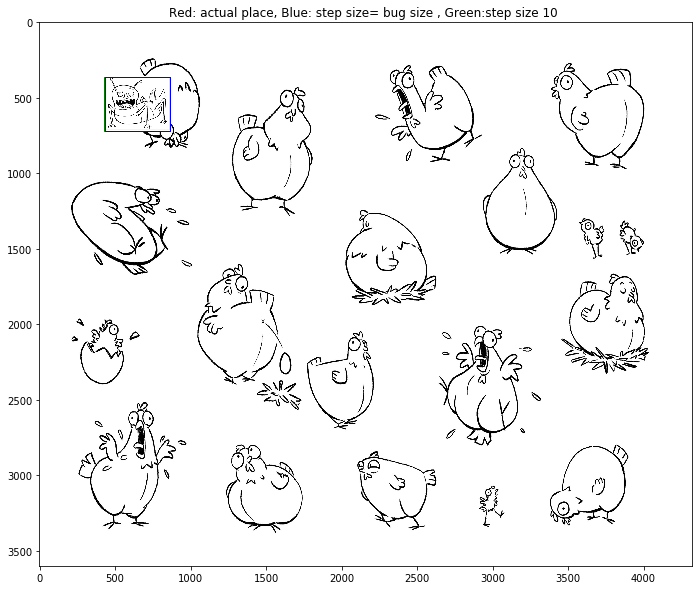

In [41]:
fig = plt.figure(figsize=(20, 10))
ax = plt.subplot()
ax.imshow(s_test[4], cmap='gray')
ax.set_title('Red: actual place, Blue: step size= bug size , Green:step size 10 ')
rect1 = plt.Rectangle((x , y), bug_w , bug_h, edgecolor='r', facecolor='none')
ax.add_patch(rect1)
rect2 = plt.Rectangle((res_test[1] ,res_test[2]), bug_w , bug_h, edgecolor='g', facecolor='none')
ax.add_patch(rect2)
rect3 = plt.Rectangle((res_test2[1] ,res_test2[2]), bug_w , bug_h, edgecolor='b', facecolor='none')
ax.add_patch(rect3)
plt.show()

method 3 that only go over patches return the exact x,y here since we put the bug inside the patch 

method 4 because it is using step size 10 gave the nearest x and y that divisible by 10 

### Puting the bug in a random potision

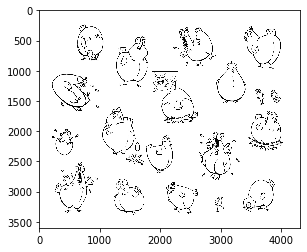

Bug is in x: 1870, y: 1010
CPU times: user 55.6 s, sys: 5.55 s, total: 1min 1s
Wall time: 1min 1s
CPU times: user 41.6 ms, sys: 4.5 ms, total: 46.1 ms
Wall time: 45.7 ms

Actual Position
Bug is in x: 1869, y: 1012
Step_size = 10
Bug is in x: 1870, y: 1010
step size= bug size
Bug is in x: 1728, y: 1080


In [42]:
# paste the bug in x,y position ch_h , ch_w
x , y = random.randint(0, ch_w - bug_w),random.randint(0, ch_h - bug_h)
s_test = paste_bug(chickens_img,bug_img,x , y,'s_test.png')

# use method4 to find the bug 
%time res_test = find_bug4(s_test,bug,10)

# use method2 to find the bug 
%time res_test2 = find_bug3(s_test,bug)
print('')
print('Actual Position')
print('Bug is in x: {}, y: {}'.format(x ,y))

print('Step_size = 10')
print('Bug is in x: {}, y: {}'.format(res_test[1] ,res_test[2]))

print('step size= bug size')
print('Bug is in x: {}, y: {}'.format(res_test2[1] ,res_test2[2]))

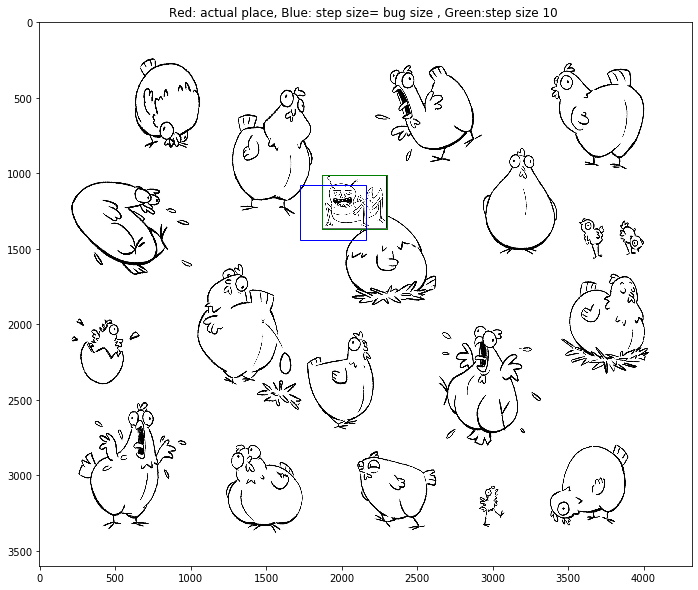

In [43]:
fig = plt.figure(figsize=(20, 10))
ax = plt.subplot()
ax.imshow(s_test[4], cmap='gray')
ax.set_title('Red: actual place, Blue: step size= bug size , Green:step size 10 ')
rect1 = plt.Rectangle((x , y), bug_w , bug_h, edgecolor='r', facecolor='none')
ax.add_patch(rect1)
rect2 = plt.Rectangle((res_test[1] ,res_test[2]), bug_w , bug_h, edgecolor='g', facecolor='none')
ax.add_patch(rect2)
rect3 = plt.Rectangle((res_test2[1] ,res_test2[2]), bug_w , bug_h, edgecolor='b', facecolor='none')
ax.add_patch(rect3)
plt.show()

In this placement I put the bug in a random position:
* method 3 returned the closest patch to the bug
* method 4 almost gave the correct x,y but is gave the nearest number that devisible by 10 

### Test While recording 

#### Placement 1 : multiply w and h of bug image by two random number between 0-9 

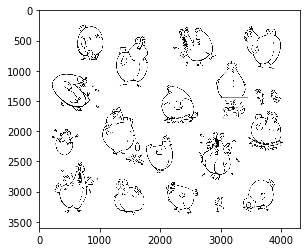

Bug is in x: 3020, y: 1440
CPU times: user 1min 2s, sys: 6.24 s, total: 1min 8s
Wall time: 1min 8s
--------------------------------------------------
Actual Position: x: 3024, y: 1440


In [49]:
# paste the bug in x,y position 
x , y = bug_w*random.randint(1, 9),bug_h*random.randint(1, 9)
s_test = paste_bug(chickens_img,bug_img,x , y,'s_test.png')

# use method4 to find the bug 
%time res_test2 = find_bug4(s_test,bug,10)
print('--------------------------------------------------')
print('Actual Position: x: {}, y: {}'.format(x ,y))

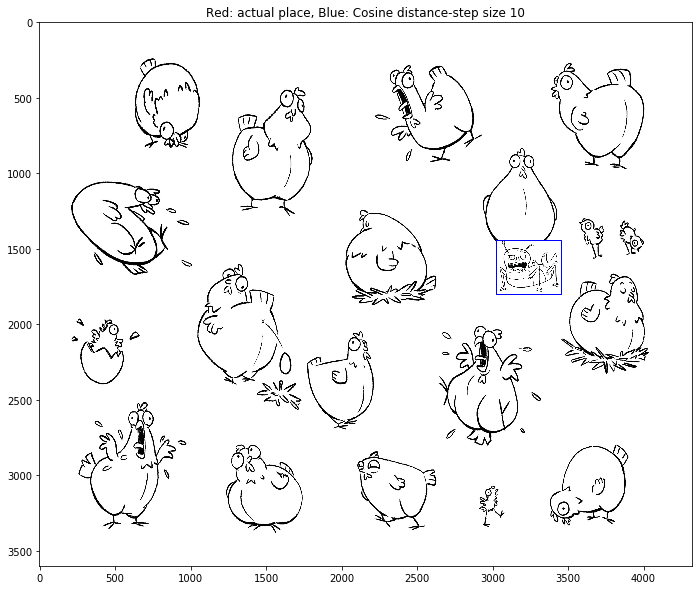

In [50]:
fig = plt.figure(figsize=(20, 10))
ax = plt.subplot()
ax.imshow(s_test[4], cmap='gray')
ax.set_title('Red: actual place, Blue: Cosine distance-step size 10')
rect1 = plt.Rectangle((x , y), bug_w , bug_h, edgecolor='r', facecolor='none')
ax.add_patch(rect1)
rect2 = plt.Rectangle((res_test2[1] ,res_test2[2]), bug_w , bug_h, edgecolor='b', facecolor='none')
ax.add_patch(rect2)
plt.show()

#### Placement 2: random x and y 

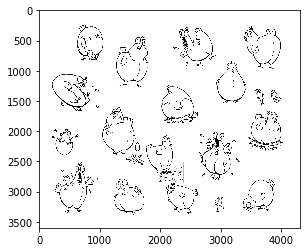

Bug is in x: 1960, y: 2500
CPU times: user 1min, sys: 6.1 s, total: 1min 6s
Wall time: 1min 6s
--------------------------------------------------
Actual Position x: 1963, y: 2503


In [51]:
# paste the bug in x,y position ch_h , ch_w
x , y = random.randint(0, ch_w - bug_w),random.randint(0, ch_h - bug_h)
s_test = paste_bug(chickens_img,bug_img,x , y,'s_test.png')

# use method4 to find the bug 
%time res_test2 = find_bug4(s_test,bug,10)
print('--------------------------------------------------')
print('Actual Position x: {}, y: {}'.format(x ,y))

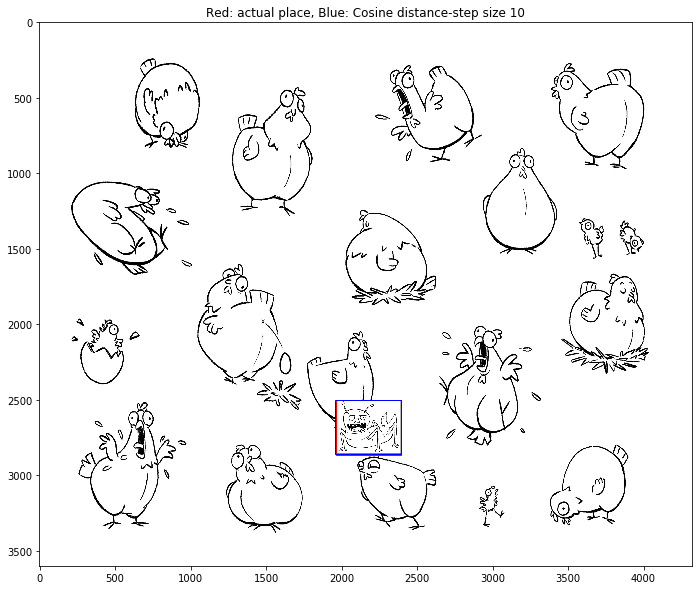

In [52]:
fig = plt.figure(figsize=(20, 10))
ax = plt.subplot()
ax.imshow(s_test[4], cmap='gray')
ax.set_title('Red: actual place, Blue: Cosine distance-step size 10')
rect1 = plt.Rectangle((x , y), bug_w , bug_h, edgecolor='r', facecolor='none')
ax.add_patch(rect1)
rect2 = plt.Rectangle((res_test2[1] ,res_test2[2]), bug_w , bug_h, edgecolor='b', facecolor='none')
ax.add_patch(rect2)
plt.show()

#### Placement 3: random x and y 

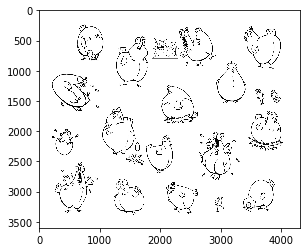

Bug is in x: 1870, y: 450
CPU times: user 1min 4s, sys: 6.65 s, total: 1min 11s
Wall time: 1min 11s
--------------------------------------------------
Actual Position x: 1870, y: 446


In [53]:
# paste the bug in x,y position ch_h , ch_w
x , y = random.randint(0, ch_w - bug_w),random.randint(0, ch_h - bug_h)
s_test = paste_bug(chickens_img,bug_img,x , y,'s_test.png')

# use method4 to find the bug 
%time res_test2 = find_bug4(s_test,bug,10)
print('--------------------------------------------------')
print('Actual Position x: {}, y: {}'.format(x ,y))

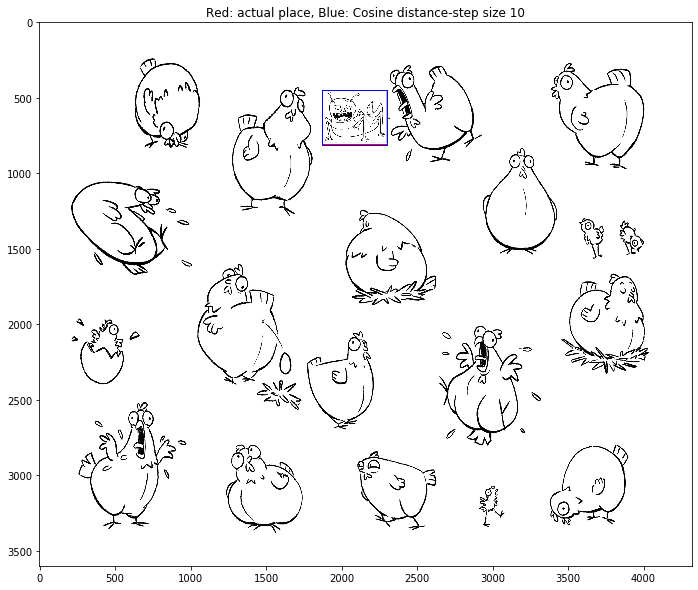

In [54]:
fig = plt.figure(figsize=(20, 10))
ax = plt.subplot()
ax.imshow(s_test[4], cmap='gray')
ax.set_title('Red: actual place, Blue: Cosine distance-step size 10')
rect1 = plt.Rectangle((x , y), bug_w , bug_h, edgecolor='r', facecolor='none')
ax.add_patch(rect1)
rect2 = plt.Rectangle((res_test2[1] ,res_test2[2]), bug_w , bug_h, edgecolor='b', facecolor='none')
ax.add_patch(rect2)
plt.show()

### Testing match_template function from skimage library(Not a part of the homework)

In [44]:
import cv2 as cv
from skimage.feature import match_template

def find_match(png,bug):
    img_bug = cv.imread(bug)
    img = cv.imread(png)
    result = match_template(img,img_bug)
    ij = np.unravel_index(np.argmax(result), result.shape)
    x,y = ij[::-1][1:]
    return (x,y)

In [45]:
%time res_4 = find_match("Chickens with bug.png","Bug Final.png")
print('Bug is in x: {}, y: {}'.format(res_4[0] ,res_4[1]))

CPU times: user 1min 5s, sys: 26.9 s, total: 1min 32s
Wall time: 1min 45s
Bug is in x: 1734, y: 1297


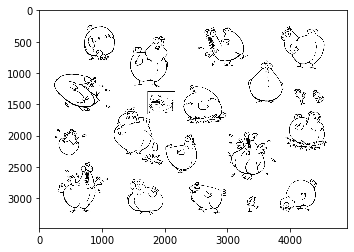

Bug is in x: 1730, y: 1300
CPU times: user 50.9 s, sys: 313 ms, total: 51.2 s
Wall time: 51.2 s


In [47]:
img = read_image("Chickens with bug.png")
%time res_test = find_bug4(img,bug,10)

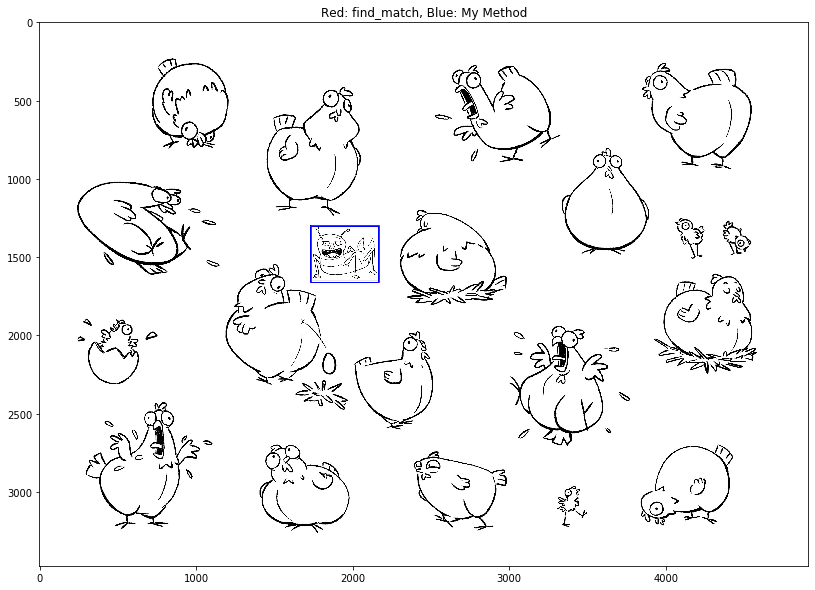

In [48]:
fig = plt.figure(figsize=(20, 10))
ax = plt.subplot()
ax.imshow(img[4], cmap='gray')
ax.set_title('Red: find_match, Blue: My Method')
rect1 = plt.Rectangle((res_4[0] ,res_4[1]), bug_w , bug_h, edgecolor='r', facecolor='none')
ax.add_patch(rect1)
rect2 = plt.Rectangle((res_test[1] ,res_test[2]), bug_w , bug_h, edgecolor='b', facecolor='none')
ax.add_patch(rect2)
plt.show()

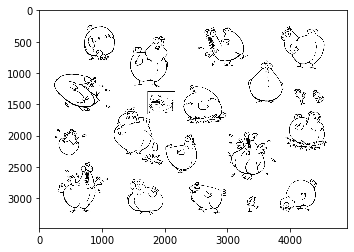

In [36]:
img = read_image("Chickens with bug.png")
arr = img[3]
h,w = img[1:3]
bug_arr =bug[3]